# Plotting a Broken Powerlaw Emissivity Profile

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

Using the equations from: https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node141.html

In [4]:
def broken_powerlaw(k,x,q1,q2,r_br):
    returnArray=[]
    for i in x:
        if i<= r_br:
            returnArray.append(k * i**(-q1))
        if i >= r_br:
            returnArray.append(k* (r_br**(q2-q1)) * i**(-q2))            
    return returnArray

In [37]:
r_out = 400         # Outer accretion edge 
k = 1               # Normalisation Constant
q1 = 5.2            # Inner emissivity index
q2 = 2.4            # Outer emissivity index
r_br = 7            # Break radii
q1_upper_err = 0.2
q1_lower_err = 0.1  
q2_upper_err = 0.2
q2_lower_err = 0.1 
r_br_upper_err = 1.4
r_br_lower_err = 1.1

x = np.linspace(1,r_out,r_out+1)
y_dat = broken_powerlaw(k,x,q1,q2,r_br)
# Calculating the upper and lower values the function can take
y_upper_err = broken_powerlaw(k,x,q1+q1_upper_err,q2+q2_upper_err,r_br+r_br_upper_err)
y_lower_err = broken_powerlaw(k,x,q1-q1_lower_err,q2-q2_lower_err,r_br-r_br_lower_err)


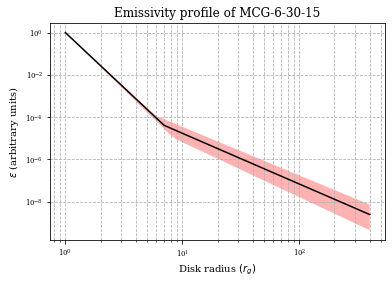

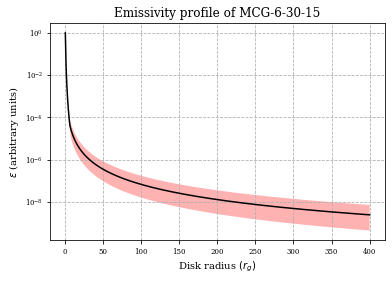

In [48]:
# Log - log plot
fig, ax = plt.subplots()
ax.plot(x,y_dat,linewidth='1.5',color='k')
# PLotting an error region using the lower and upper bounds for the power law parameters
ax.fill_between(x,y_lower_err,y_upper_err,facecolor='r',alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True,which='both',axis='both',ls='--')
ax.set_xlabel("Disk radius $(r_g)$")
ax.set_ylabel(r"$\epsilon$ (arbitrary units)")
plt.title("Emissivity profile of MCG-6-30-15")
plt.savefig('emissivity_curve_log.png', dpi = 300)
plt.show()

# log-linear plot
fig, ax = plt.subplots()
ax.plot(x,y_dat,linewidth='1.5',color='k')
ax.fill_between(x,y_lower_err,y_upper_err,facecolor='r',alpha=0.3)
ax.set_yscale('log')
ax.grid(True,which='both',axis='both',ls='--')
ax.set_xlabel("Disk radius $(r_g)$")
ax.set_ylabel(r"$\epsilon$ (arbitrary units)")
plt.title("Emissivity profile of MCG-6-30-15")
plt.savefig('emissivity_curve_linear.png', dpi = 300)
plt.show()

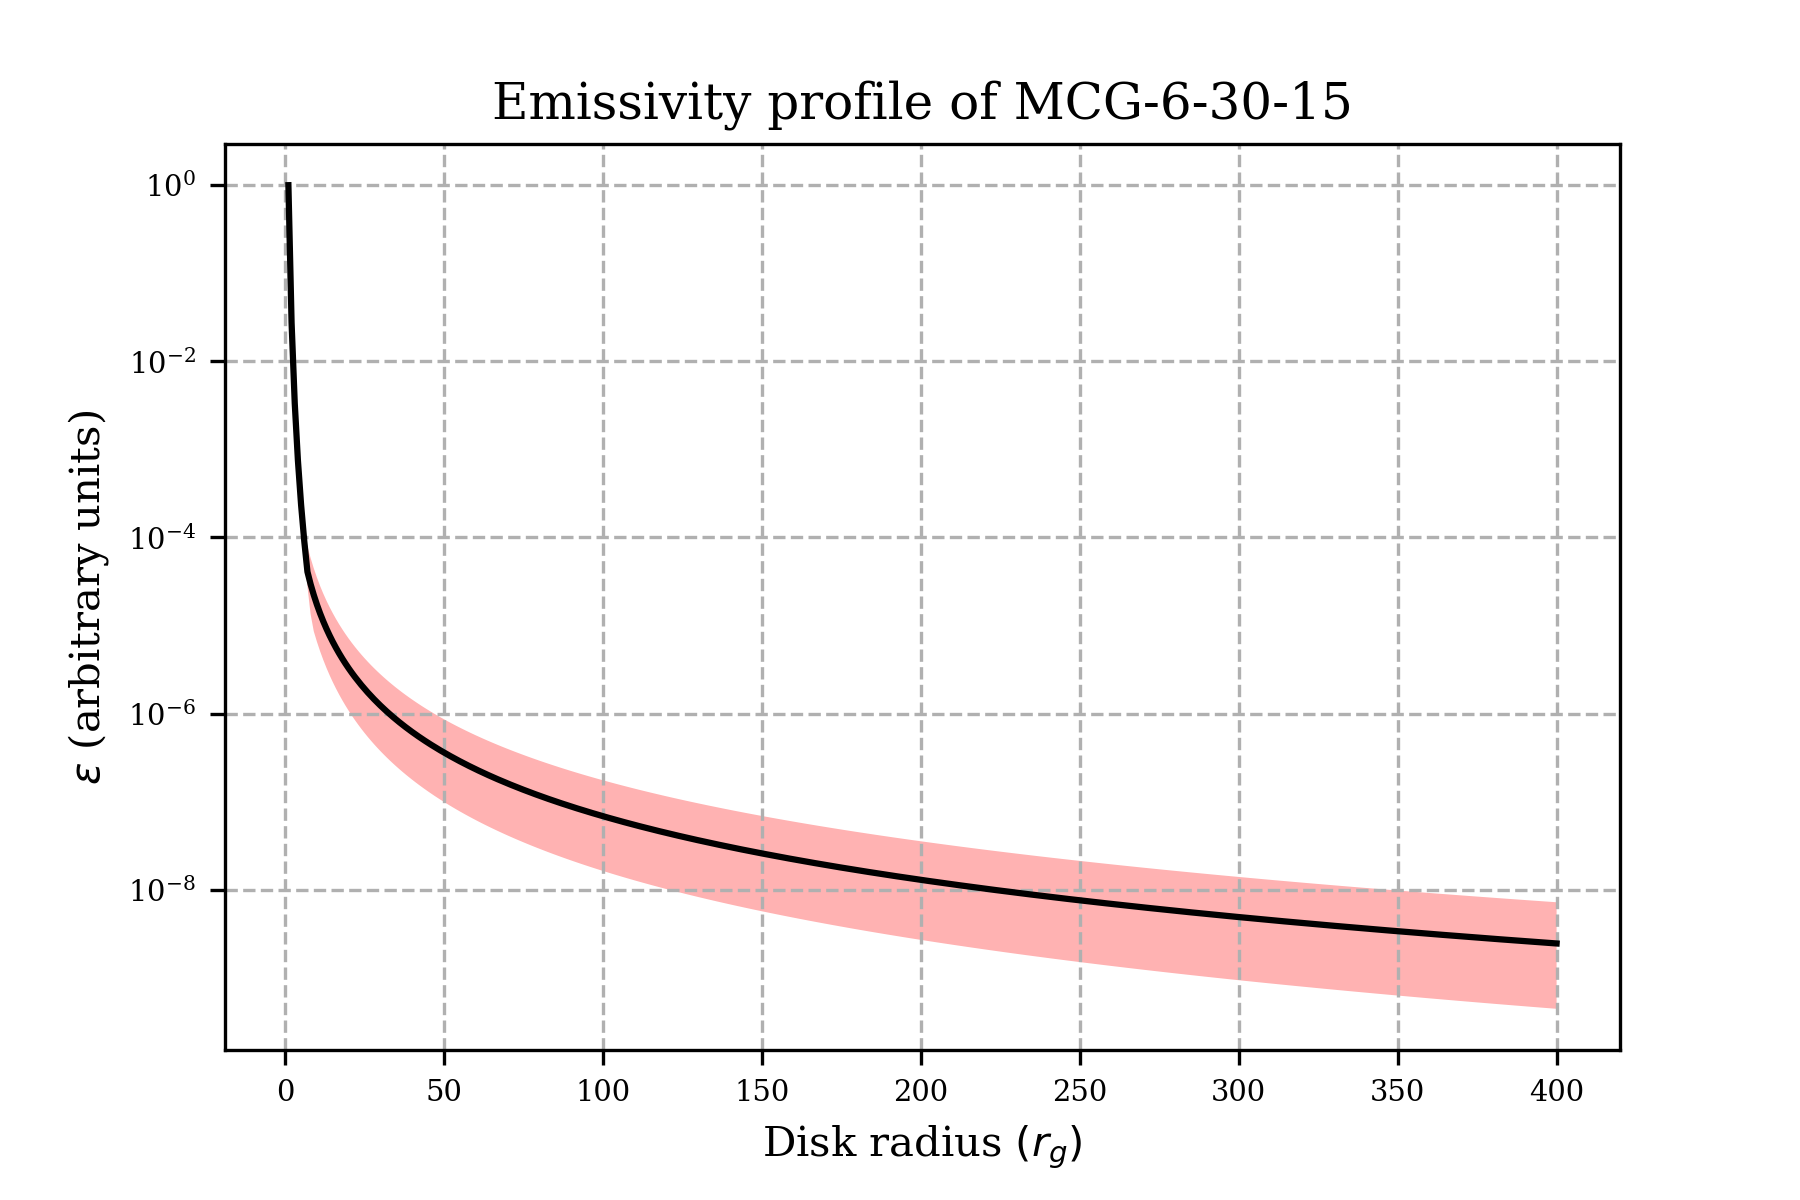

In [49]:
Image('emissivity_curve_linear.png')

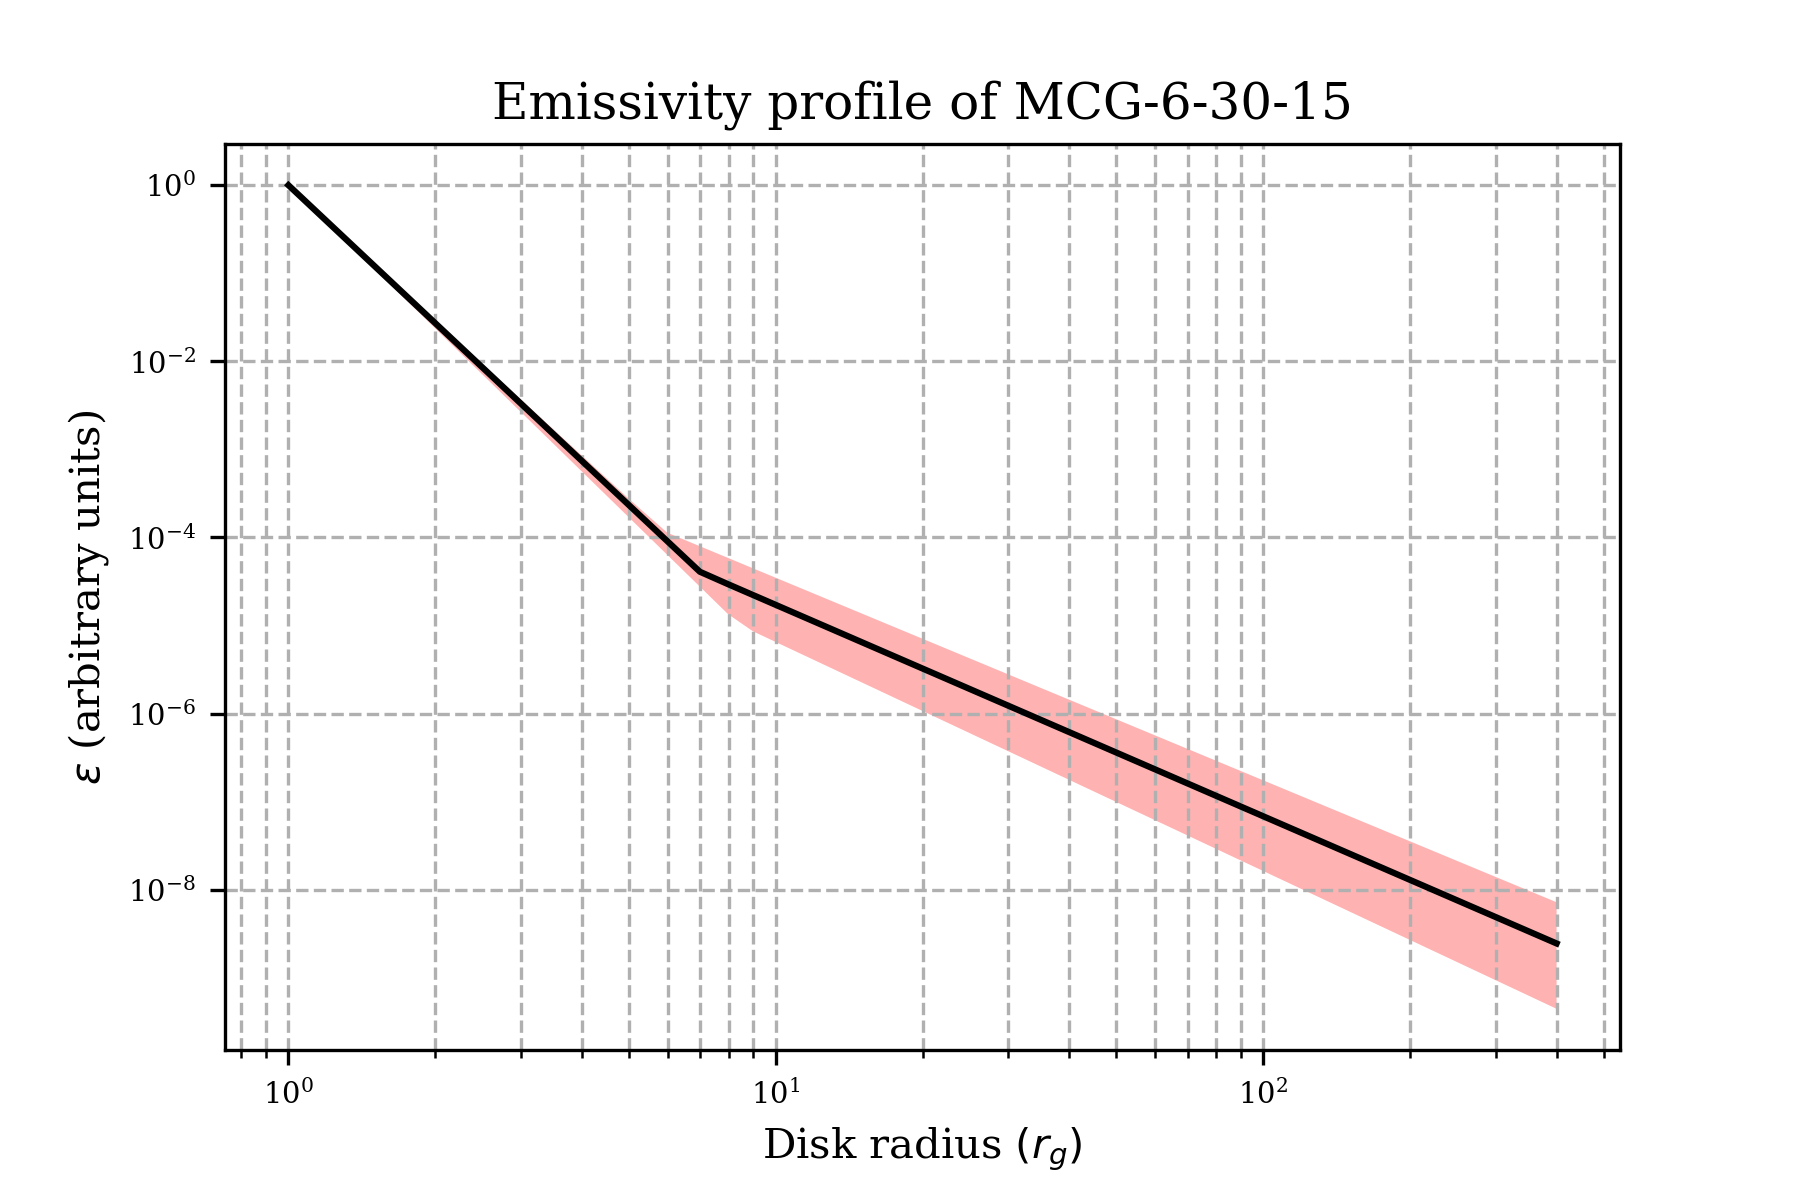

In [50]:
Image('emissivity_curve_log.png')

## Plotting emissivity profile for varying break radii

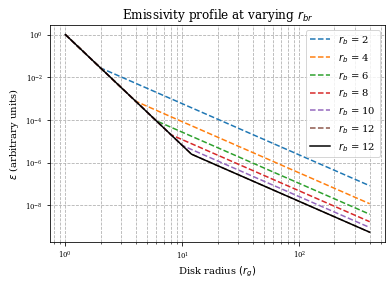

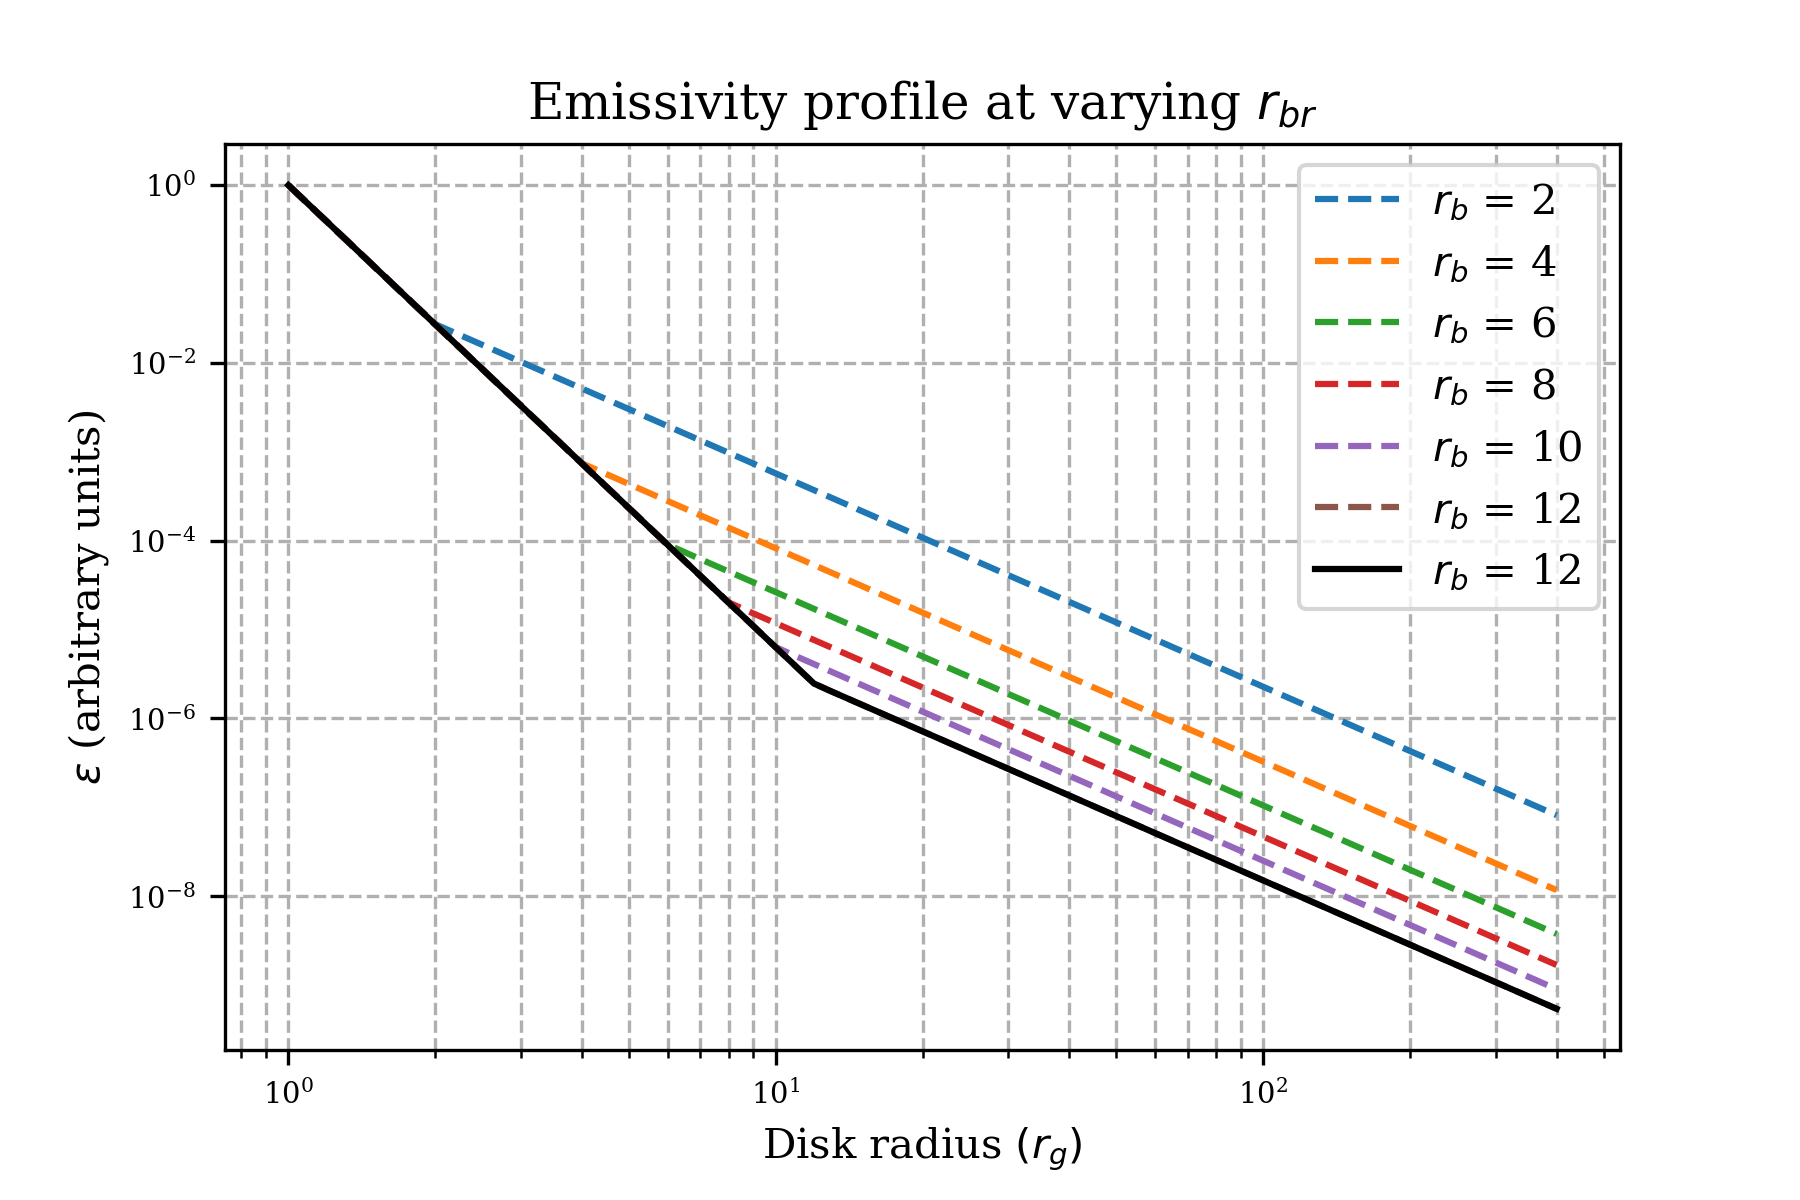

In [9]:
# A list of break radii to plot
r_set=[2,4,6,8,10,12]
y_dat_list=[]
for i in r_set:
    y_dat = broken_powerlaw(k,x,q1,q2,i) 
    plt.plot(x,y_dat,label='$r_b$ = {:}'.format(i),ls='--')
plt.plot(x,y_dat[0:],label='$r_b$ = {:}'.format(i),ls='-',color='k')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Disk radius $(r_g)$")
plt.ylabel(r"$\epsilon$ (arbitrary units)")
plt.grid(True,which='both',ls='--')
plt.title(r"Emissivity profile at varying $r_{br}$")
plt.savefig('emissivity_curve_varied_log.png', dpi = 300)
plt.show()    

Image('emissivity_curve_varied_log.png')

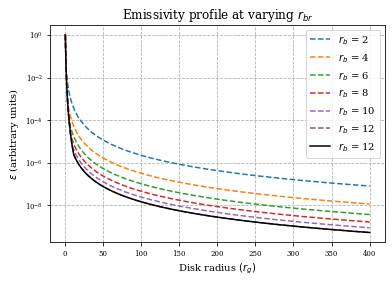

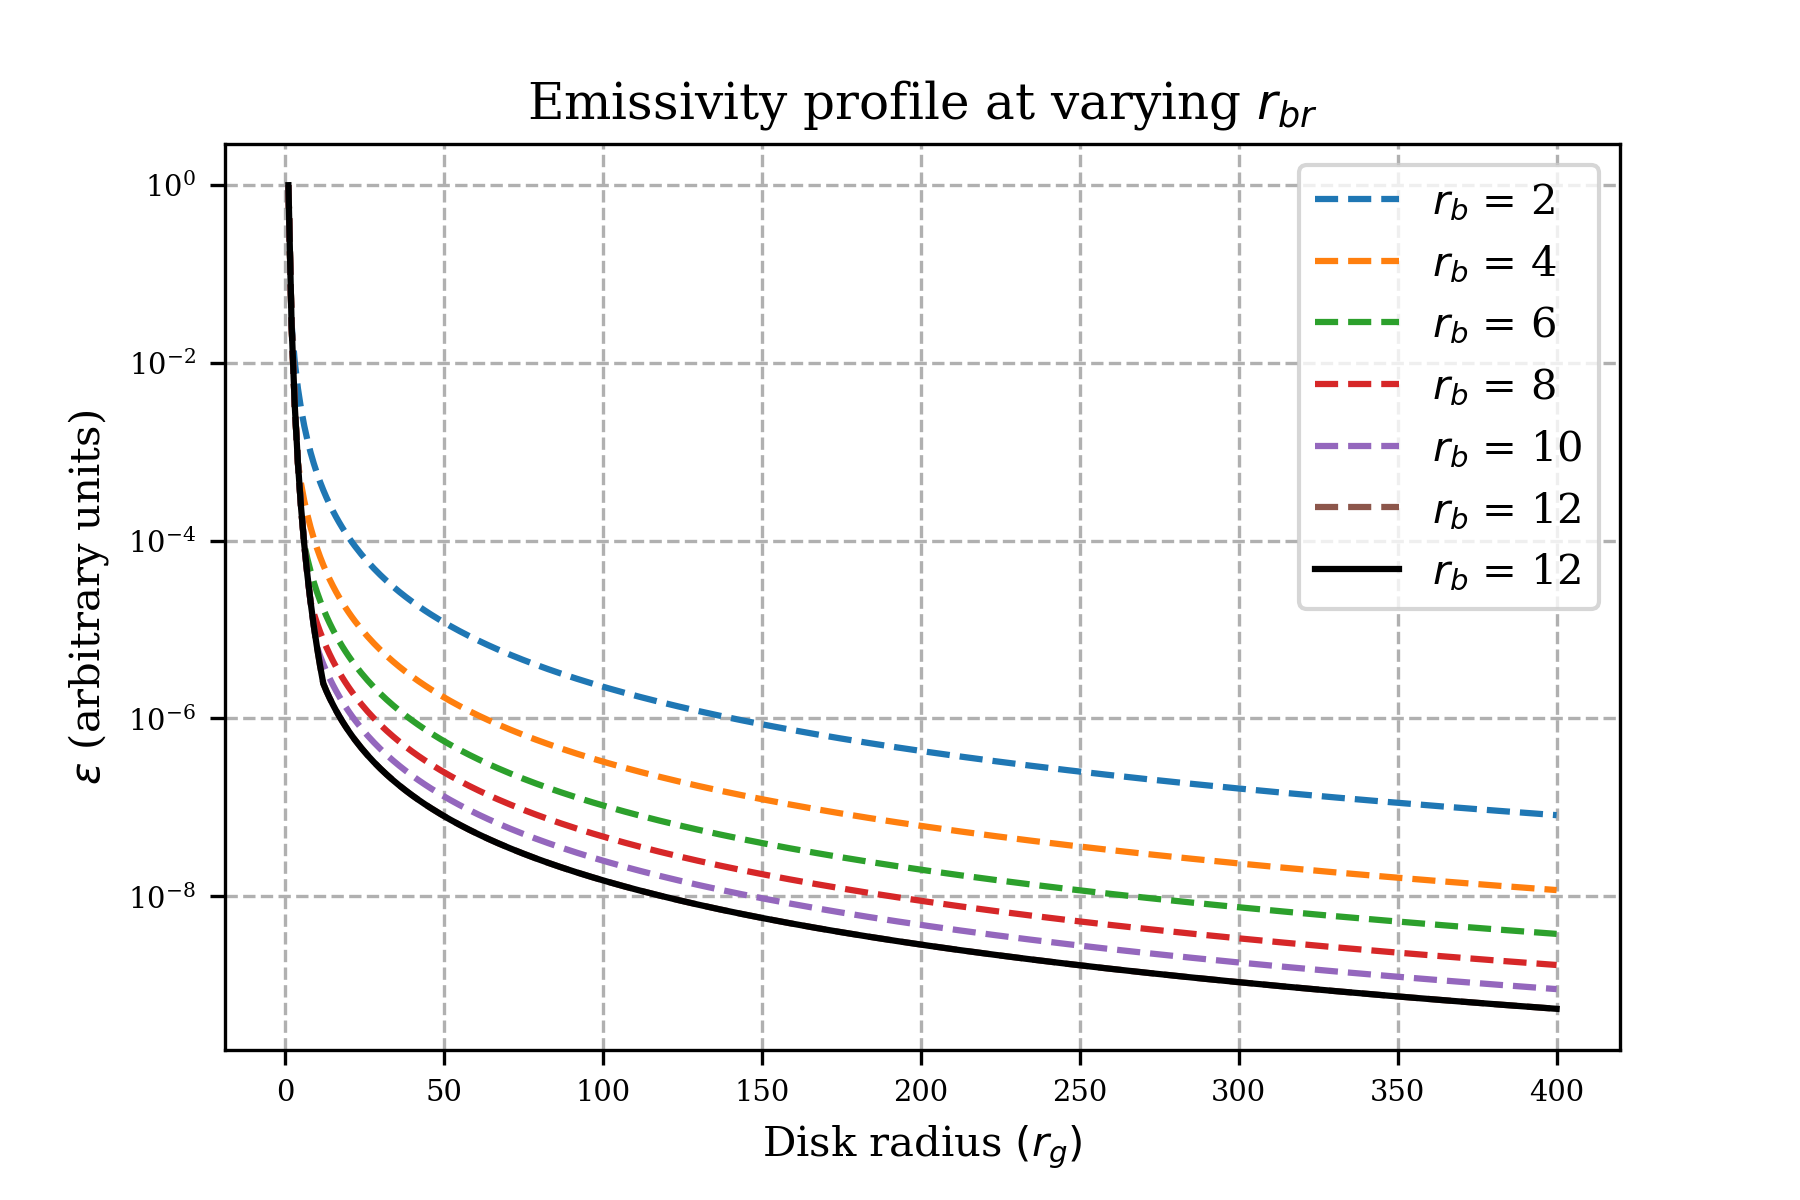

In [10]:
for i in r_set:
    y_dat = broken_powerlaw(k,x,q1,q2,i) 
    plt.plot(x,y_dat,label='$r_b$ = {:}'.format(i),ls='--')
plt.plot(x,y_dat[0:],label='$r_b$ = {:}'.format(i),ls='-',color='k')
plt.legend()
plt.yscale('log')
plt.xlabel("Disk radius $(r_g)$")
plt.ylabel(r"$\epsilon$ (arbitrary units)")
plt.grid(True,which='both',ls='--')
plt.title(r"Emissivity profile at varying $r_{br}$")
plt.savefig('emissivity_curve_varied_linear.png', dpi = 300)
plt.show()    

Image('emissivity_curve_varied_linear.png')
    

## Plotting emissivity profile for varying inner index

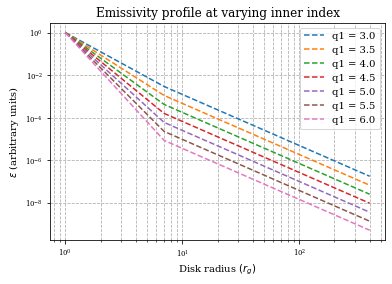

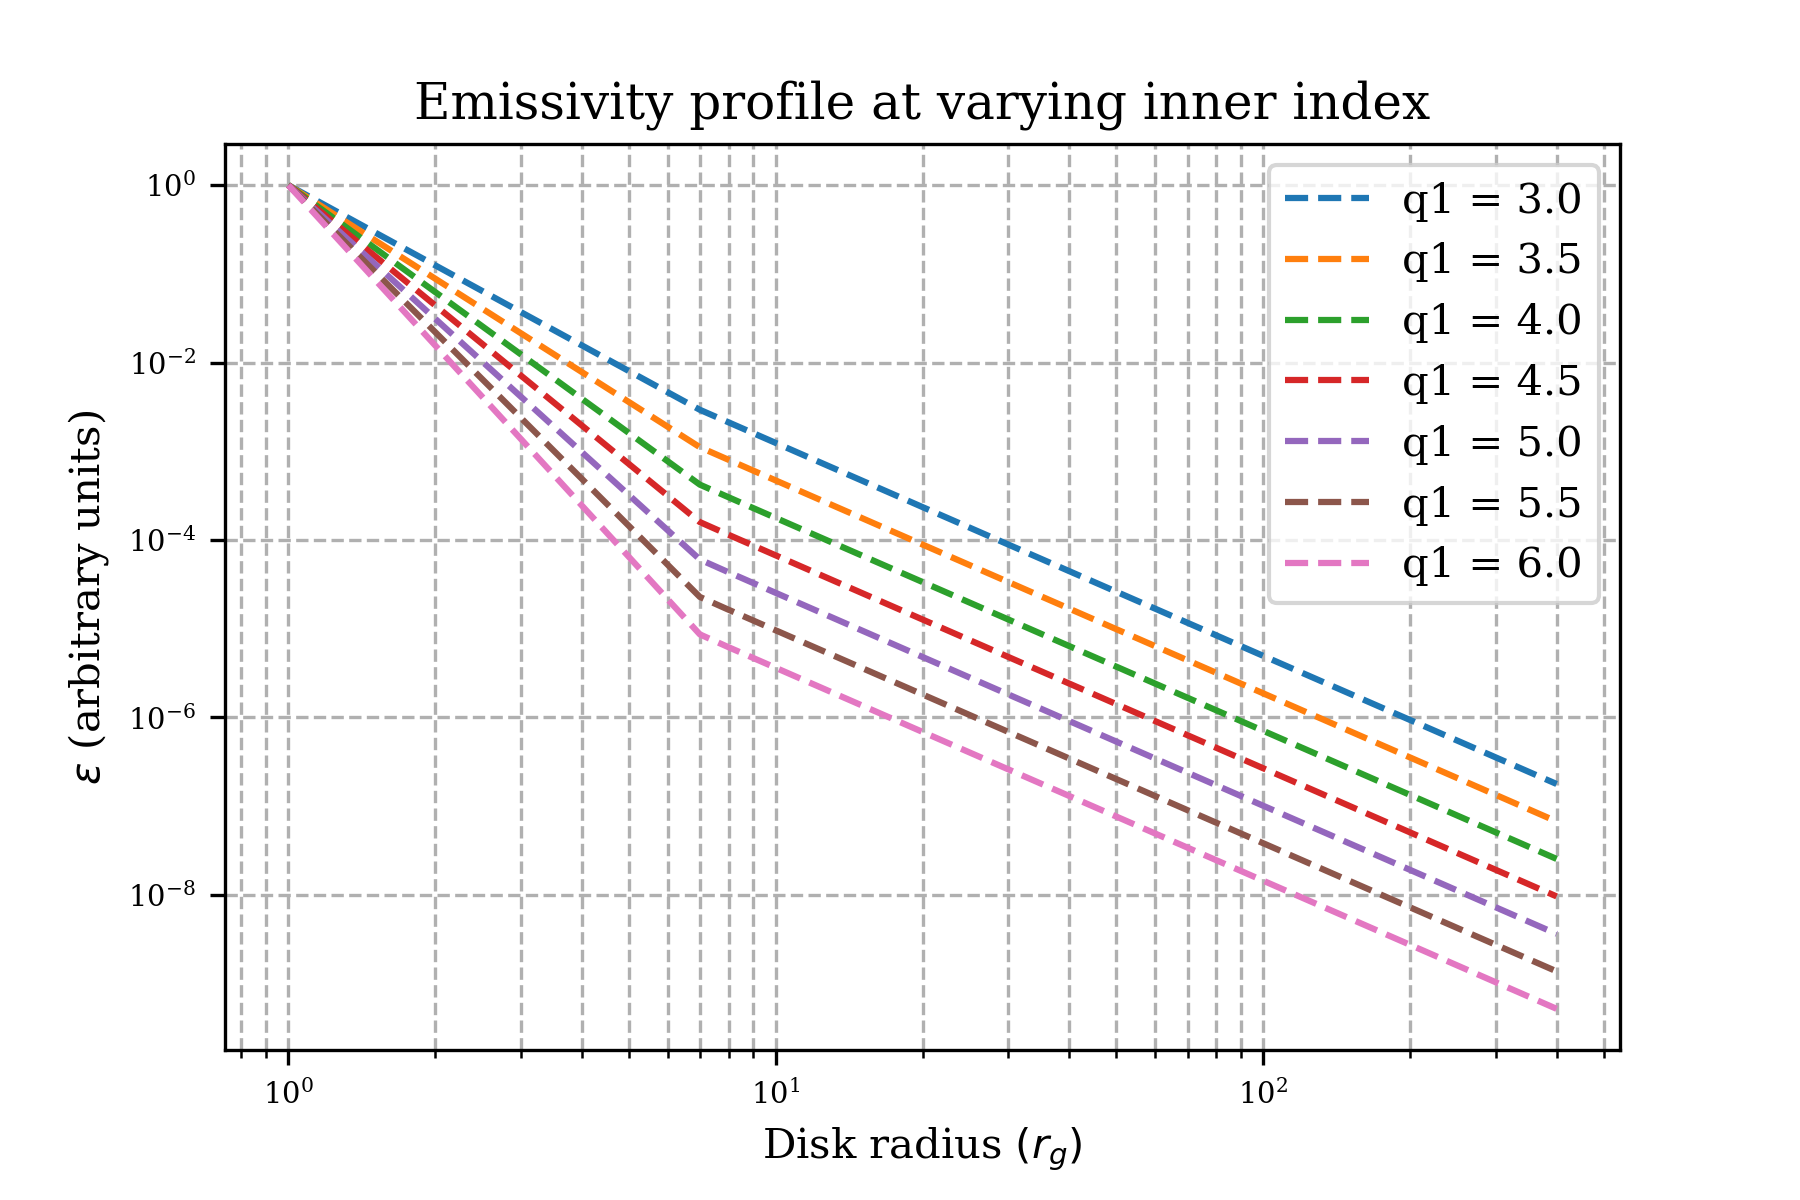

In [11]:
# A list of q1 to plot
q_set=[3,3.5,4,4.5,5,5.5,6]
y_dat_list=[]
for i in q_set:
    y_dat = broken_powerlaw(k,x,i,q2,r_br) 
    plt.plot(x,y_dat,label='q1 = {:.1f}'.format(i),ls='--')
#plt.plot(x,y_dat[0:],label='q1 = {:.1f}'.format(i),ls='-', color='k')    
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Disk radius $(r_g)$")
plt.ylabel(r"$\epsilon$ (arbitrary units)")
plt.grid(True,which='both',ls='--')
plt.title(r"Emissivity profile at varying inner index")
plt.savefig('emissivity_curve_index_log.png', dpi = 300)
plt.show()    

Image('emissivity_curve_index_log.png')